## Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

## Risk profiles of call option buyer and seller

Buying a call option gives you the right, but not the obligation, to buy the underlying security at the given strike price. Therefore a call option payoff at expiration depends on where the underlying price is relative to the call option strike price. 

In this notebook, we will plot a call buyer's and a call seller's payoff graph for a 900 strike price call on the Infosys stock.

## Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

## Call payoff
We define a function call_payoff that calculates the payoff from buying a call option. The function takes sT, a range of possible values of the stock price at expiration, the strike price of the call option and premium of the call option as input. 

It returns a numpy array containing the profit from call option for different the stock price. When the stock price is greater than the strike price, the profit is the difference between stock price and strike price and when the stock price is less than the strike price the profit is zero. After this, a call premium is deducted from the pnl.

In [7]:
def call_payoff(sT, strike_price, premium):
    pnl = np.where(sT > strike_price, sT - strike_price, 0)    
    return pnl - premium

## Define parameters

We will define the spot price, the strike price, premium, and a range of possible values for the Infosys stock price at expiry.

In [8]:
# Infosys stock price 
spot_price = 900 

# Call strike price and cost
strike_price = 900 
premium = 20

# Stock price range at the expiration of the call
# We have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price,1.1*spot_price) 

## Call option buyer payoff

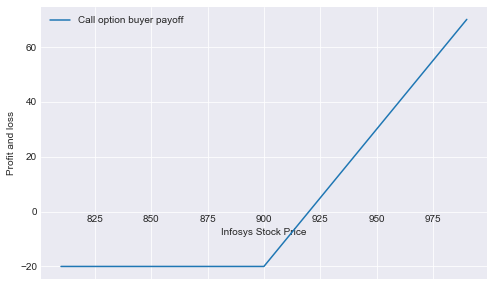

In [9]:
payoff_long_call = call_payoff(sT, strike_price, premium)
# Plot the graph
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Call option buyer payoff')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

So what do you observe? 

1. Even if the price of Infosys goes below the strike price of 900, the maximum loss seems to be just INR 20/-. Therefore, the loss to the call option buyer is restricted to the extent of the premium he has paid.

2. The profit from this call option seems to increase linearly as and when Infosys starts to move above the strike price of 900. Therefore, the higher the spot price goes from the strike price, the higher is the profit.

3. Though the call option is supposed to make a profit when the spot price moves above the strike price, the call option buyer first needs to recover the premium he has paid.

From the above points, we can say that the buyer of the call option has limited risk and the potential to make an unlimited profit.


## Call option seller payoff

Option buyer and option seller are the two sides of the same coin. Therefore, to get the payoff graph for option seller, we have multiplied the payoff of option buyer by -1.0 as when the option buyer makes the profit, the option seller will lose the exact same amount and vice-versa.

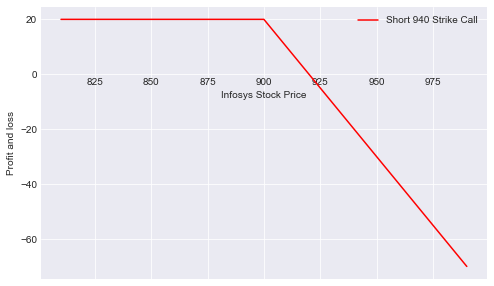

In [10]:
payoff_short_call = payoff_long_call * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 940 Strike Call',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The call option seller payoff looks like a mirror image of the call option buyer payoff. 

1. The profit is restricted to INR 20/- as long as the spot price is trading at any price below the strike of 900.
2. From 900 to 920, we can see the profits getting reduced.
3. Above 920, the call option seller starts losing money. The losses increase with an increase in stock price.

Therefore, you sell a call option only when your view is that the underlying asset will not increase beyond the strike price.